In [91]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 3

Y_0 = np.random.choice([0, 1], size=(m,1) , p=[.5, .5])
Y_1 = np.array([y*2-1 for y in Y_0])

I = np.ones((m,1))

X = np.random.rand(m,n)

x0 = np.ones((m,1))
X = np.hstack((x0,X))



def sigmoid(x):
    return 1. / (1. + np.exp(-x))



In [92]:

def L(w, X, y):
    Xw =np.dot(X,w)
    
    YtXw = np.dot(np.transpose(y),Xw)

    Delta = np.log(I+np.exp(Xw))

    return np.sum(-YtXw+np.dot(np.transpose(I),Delta),axis=0)
    #return np.dot(y,Xw) - np.log(1 + np.exp(dot))

def dL(w, X, y):
    Xw=np.dot(X,w)

    distance = sigmoid(Xw)-y
    
    #distance = distance.reshape(-1, 1)
    #return np.mean(distance * X, axis=0)
    return np.dot(np.transpose(X),distance)



def GD(w, X, y, epoch, lr):
    l_list = []
    for i in range(epoch):
    
        dw= dL(w,X, y)
        w -= lr * dw
        l =  L(w, X, y)

        l_list = np.append(l_list,l)
    return w, l_list



In [93]:
def L1(w, X, y):
    
    Xw =np.dot(X,w)
    YtXw = np.dot(np.transpose(y),Xw)

    Delta = np.log(I+np.exp(-YtXw)) 

    return np.sum(np.dot(np.transpose(I),Delta),axis=0)

def dL1(w, X, y):
    Xw=np.dot(X,w)
    YtX = np.transpose(y)*X

    YtXw = np.dot(YtX,w)
    return -sigmoid(-YtXw)*YtX

def GD1(w, X, y, epoch, lr):
    l_list = []

    for i in range(epoch):
        dw= dL1(w,X, y)
        w -= lr * dw
        l =  L1(w, X, y)
        l_list = np.append(l_list,l)
    return w, l_list


C:\Users\yzhng\AppData\Local\Temp\ipykernel_19000\1580728085.py:20: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


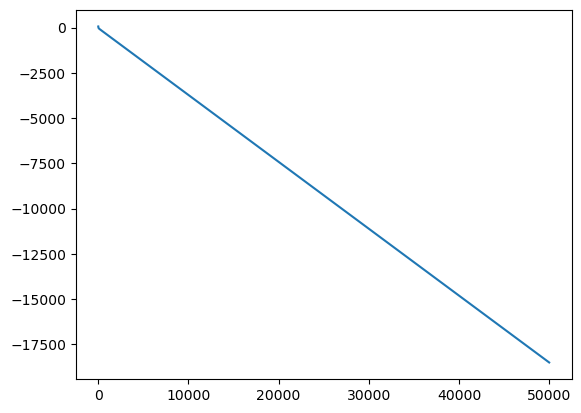

In [94]:
w0 = np.zeros([n+1,1])
w1 = np.zeros([n+1,1])

ITER = 500000
#w0,L0_LIST = GD(w0,X,Y_0,ITER,0.0001)
w1,L1_LIST= GD(w1,X,Y_1,ITER,0.0001)


iters = list(range(0,ITER))

#plt.plot(iters,L0_LIST)
plt.plot(iters,L1_LIST)


In [95]:
print(w0)
print(w1)

[[0.]
 [0.]
 [0.]
 [0.]]
[[-701.15699156]
 [-282.83783158]
 [-240.01139598]
 [-544.85237087]]
